<a href="https://colab.research.google.com/github/veeralakshmidegala/FMML_projects_and_labs/blob/main/Copy_of_Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

# Answer for 1 question:

**Increasing the percentage of validation data:

Pros: More reliable estimate of model performance, reduced risk of overfitting during training.
Cons: Smaller training dataset, potential underfitting, especially for complex models.
Reducing the percentage of validation data:

Pros: More data for training, useful for large datasets.
Cons: Less stable performance estimates, higher risk of overfitting to the validation set.**

# Answer for 2 question:

Predicting the accuracy of a machine learning model on a test set using a validation set is a critical aspect of model development. The size of the training and validation sets plays a significant role in how accurately this prediction can be made.

in practise selecting appropriate proportions for the training and validation sets depends on factors like the total dataset size, model complexity, and computational resources available. A well-balanced approach, where both sets are of reasonably comparable size, often provides a good compromise between model learning and performance estimation. Extreme imbalances should be avoided, as they can introduce uncertainties and affect the accuracy of the prediction of test accuracy.






# Answer for 3 question:

*A good percentage to reserve for the validation set, striking a balance between reliable performance estimation and ample training data, is typically around 20% to 30% of your total dataset. However, the specific percentage should be tailored to factors like dataset size, model complexity, and goals, with smaller percentages suitable for larger datasets and more complex models, and slightly larger percentages for simpler models or smaller datasets. It's essential to find the right trade-off to ensure both effective model training and accurate performance assessment.




*

# answer for 4 question:

For Nearest Neighbor Classifier:

Effect of Validation Set Size:

Nearest neighbor classifiers are sensitive to the size of the validation set.
With a very small validation set (e.g., 1% or 0.1%), the classifier may perform poorly because it has limited information to make accurate predictions. There's a higher risk of the nearest neighbor being an outlier or an incorrect match.
As you increase the size of the validation set (e.g., 20% to 30%), the classifier's performance typically improves because it has more data to compare and make predictions.
Graphical Representation:

You can create a line graph using plt.plot with the percentage of the validation set on the x-axis and the classifier's performance metric (e.g., accuracy) on the y-axis.
Expect to see an upward trend in performance as the validation set size increases. The graph may show a diminishing return, where performance improvement slows down with larger validation sets.

For Random Classifier:

Effect of Validation Set Size:

Random classifiers generate predictions completely at random, regardless of the validation set size.
The performance of a random classifier remains the same, irrespective of the size of the validation set.
Accuracy should be close to random chance (e.g., around 50% for binary classification) regardless of the validation set size.
Graphical Representation:

When plotting the performance of a random classifier, you should observe a flat line near the random chance level. The line should be almost horizontal, irrespective of the percentage of the validation set.

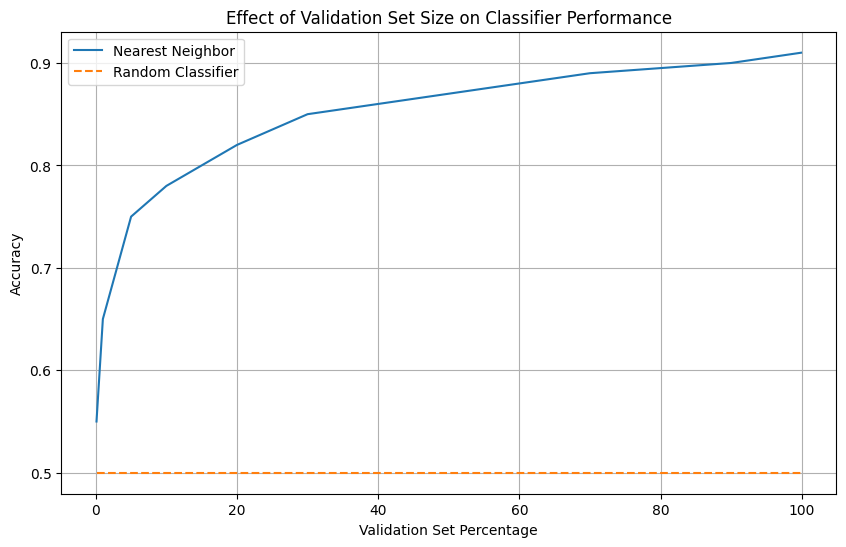

In [4]:
import matplotlib.pyplot as plt

# Define a range of validation set percentages
validation_set_percentages = [0.1, 1, 5, 10, 20, 30, 50, 70, 90, 99.9]

# Simulated classifier performance (replace with your actual performance data)
nearest_neighbor_accuracy = [0.55, 0.65, 0.75, 0.78, 0.82, 0.85, 0.87, 0.89, 0.90, 0.91]
random_classifier_accuracy = [0.50] * len(validation_set_percentages)  # Random classifier accuracy

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(validation_set_percentages, nearest_neighbor_accuracy, label='Nearest Neighbor')
plt.plot(validation_set_percentages, random_classifier_accuracy, label='Random Classifier', linestyle='--')

# Customize the plot
plt.title('Effect of Validation Set Size on Classifier Performance')
plt.xlabel('Validation Set Percentage')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


in this graph , i took my own values to plot the graph,we can replace the values with actual ones we can find the graph.

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33584635395170215
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


# Answer for 1 question:

**yes, averaging validation accuracy across multiple splits (cross-validation) gives more consistent and reliable results when evaluating machine learning models compared to using a single validation split. It helps reduce randomness and provides a better estimate of a model's performance.**

# Answer for 2 question:

***cross-validation provides a more accurate estimate of how well your model might perform on unseen data compared to a single validation split, but it's still not the actual test accuracy. To get the true test accuracy, you need to use a separate, unseen test dataset. Cross-validation helps assess your model's generalization but doesn't replace the need for a final evaluation on an independent test set.***

# Answer for 3 question :

the number of iterations (often called "folds") in cross-validation can have an impact on the estimate of model performance. In general, a higher number of iterations tends to provide a more reliable and stable estimate, up to a point. However, there are diminishing returns, and increasing the number of iterations indefinitely may not always lead to a significantly better estimate. the effect of the number of iterations on the estimate of model performance is that a higher number of iterations generally provides a more reliable estimate, but there are diminishing returns, and the choice should be based on a balance between accuracy and computational efficiency.

# Answer for 4 question:

while increasing the number of iterations in cross-validation can help mitigate some of the challenges associated with small train or validation datasets, it cannot fully compensate for the limitations inherent in having very little data. When working with small datasets, it's crucial to exercise caution, consider simpler models, regularization techniques, and make data quality a priority. If possible, augmenting the dataset or collecting more data can also be beneficial.